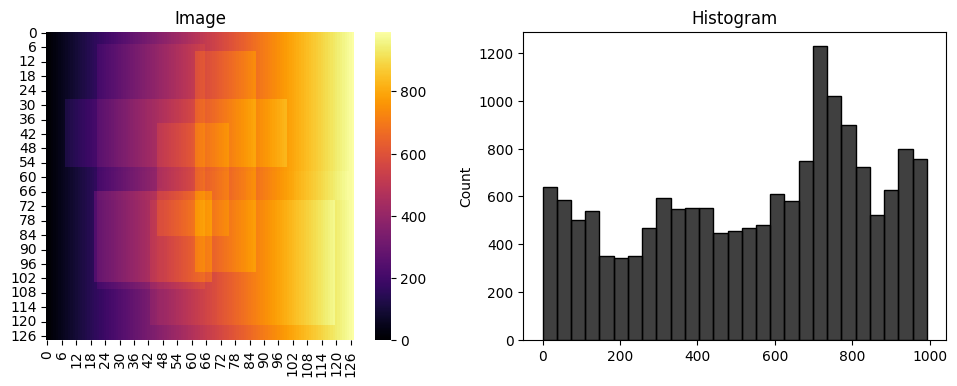

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nanopyx.core.image.add_squares import add_squares
from nanopyx.core.image.add_ramp import add_ramp


# create an intensity gradient image
w = 128
h = 128
image = np.zeros((w, h), dtype="float32")
add_ramp(image, 1000)
add_squares(image, 100, nSquares=10)
image_original = image.copy()


# Create a figure with 2 subplots arranged in a row
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the image
sns.heatmap(image, ax=axs[0], cmap='inferno', square=True)
axs[0].set_title("Image")

# Plot the histogram
sns.histplot(image.flatten(), ax=axs[1], color='black')
axs[1].set_title("Histogram")

# Show the figure
plt.show()


Text(0.5, 1.0, 'with mixed-poison-gaussian')

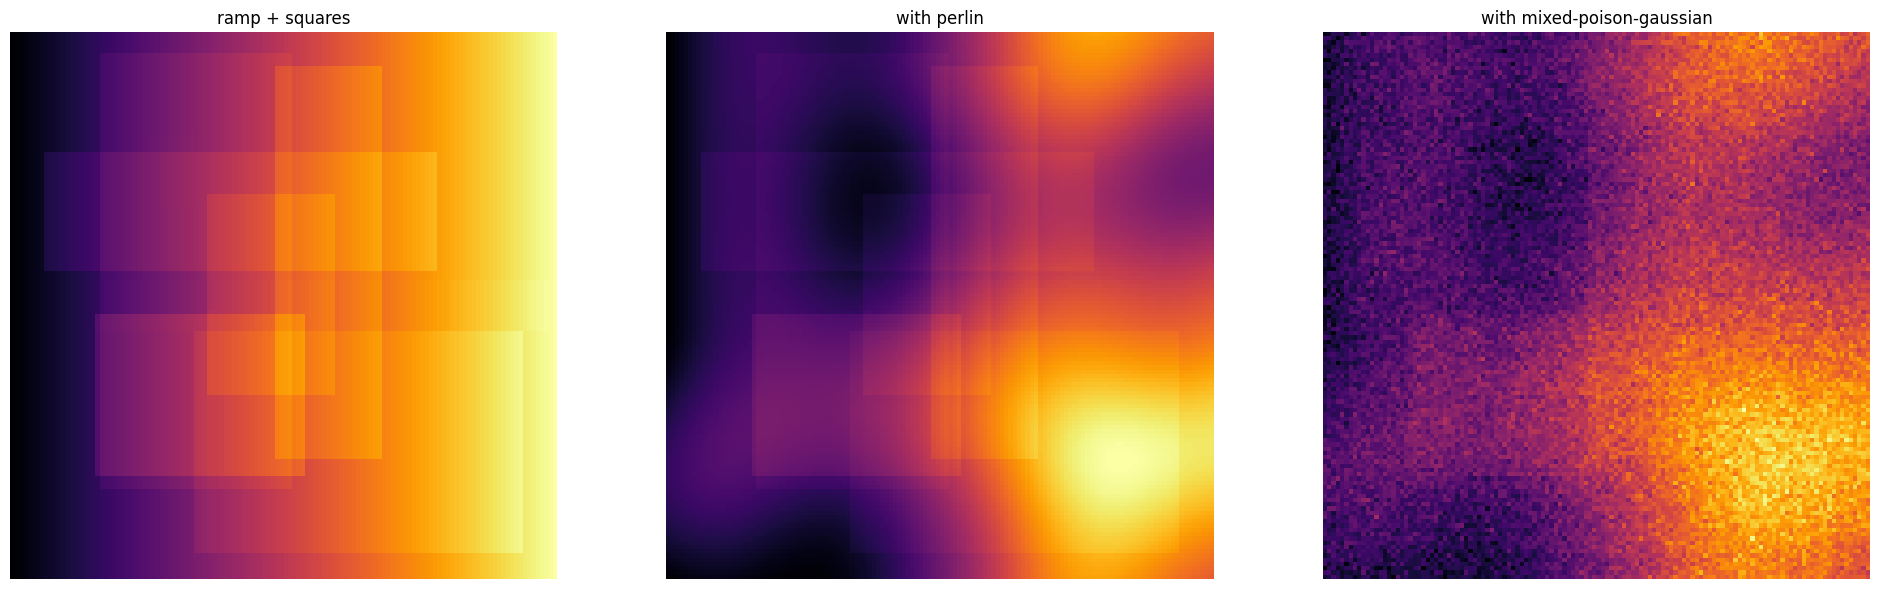

In [3]:
from nanopyx.core.image.add_random_noise import (
    add_mixed_gaussian_poisson_noise,
    add_mixed_gaussian_poisson_noise2,
    add_perlin_noise,
)

image = image_original.copy()

# Create a figure with 3 subplots arranged in a row
fig, axs = plt.subplots(1, 3, figsize=(24, 24))
sns.heatmap(image, ax=axs[0], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)
add_perlin_noise(image, amp=1000, f=2)
sns.heatmap(image, ax=axs[1], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)
add_mixed_gaussian_poisson_noise(image, gauss_sigma=100, gauss_mean=100)
sns.heatmap(image, ax=axs[2], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)
axs[0].set_title("ramp + squares")
axs[1].set_title("with perlin")
axs[2].set_title("with mixed-poison-gaussian")


In [4]:
from nanopyx.core.image.add_random_noise import (
    add_mixed_gaussian_poisson_noise,
    add_mixed_gaussian_poisson_noise2,
    add_perlin_noise,
)

gaussSigma = 100
gaussMean = 500

image = image_original.copy() 
%timeit add_mixed_gaussian_poisson_noise2(image, gauss_sigma = gaussSigma, gauss_mean = gaussMean)

image = image_original.copy()
%timeit add_mixed_gaussian_poisson_noise(image, gauss_sigma = gaussSigma, gauss_mean = gaussMean)

2.04 ms ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.36 ms ± 35.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
